# Homework 4 - Part 1

In this assignment, I will be downloading three related sets of data. I will be scouring the FRED database in order to retrieve these sets. The two .py files made during class will be made of use. They will be provided below before I get started. I will explain how I believe that the datasets are related, and provide visualizations to reinforce my thoughts.

Below are the plots.py and FRED.py files:

In [10]:
#plots.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    plot_vars = list(df.keys())
    for x in plot_vars:
        for y in plot_vars:
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
            
            if "Year" not in df.keys():
                df["Year"] = [int(str(ind)[:4]) for ind in df.index]
                
            df.plot.scatter(x = x, y = y, s = s, ax = ax, c = "Year", cmap = "plasma")
                
            ax.tick_params(axis = 'x', rotation =90)
            ax.tick_params('both', length = 0, which = 'both')
                
            if save_fig:
                try:
                       os.mkdir("plots")
                except:
                    pass
                
                directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                plt.savefig(directory + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")
                    
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)
    df.plot.line(linewidth = linewidth, ax = ax)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.tick_params('both', length = 0, which = 'both')
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals])
    
    remove_chars = "[]:$'\\"
    filename=str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50]+ " line.png", bbox_inches = "tight")
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")

In [11]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0;
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:key}, inplace = True)
            
            i = None
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
        return df

Now, onto the datasets. I was not too sure as to what direction I wanted to take with this. But after looking around, I stumbled upon some datasets that I would like to jointly observe. My datasets will look at the federal debt. They will showcase the total public debt, the debt held by the public, and the debt held by foreign and international investors.

In [13]:
from datlib.plots import *
from datlib.FRED import *

data_codes = {"Federal Debt: Total Public Debt ($ Bil)": "GFDEBTN",
              "Federal Debt: Held by the Public ($ Bil)" : "FYGFDPUN",
              "Federal Debt: Held by Foreign and International Investors ($ Bil)" : "FDHBFIN"
             }

start = datetime.datetime(1970,1,1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")

data

,Federal Debt: Total Public Debt
DATE,
1970-03-31,372007.0
1970-06-30,370094.0
1970-09-30,378678.0
1970-12-31,389158.0
1971-03-31,391668.0
...,...
2019-06-30,22023283.0
2019-09-30,22719402.0
2019-12-31,23201380.0


Now that we have our data loaded, we can start to analyze it. To start, we can use a stacked line graph, which will show the growth/decay across the years. We will code the function to construct our line graph below:

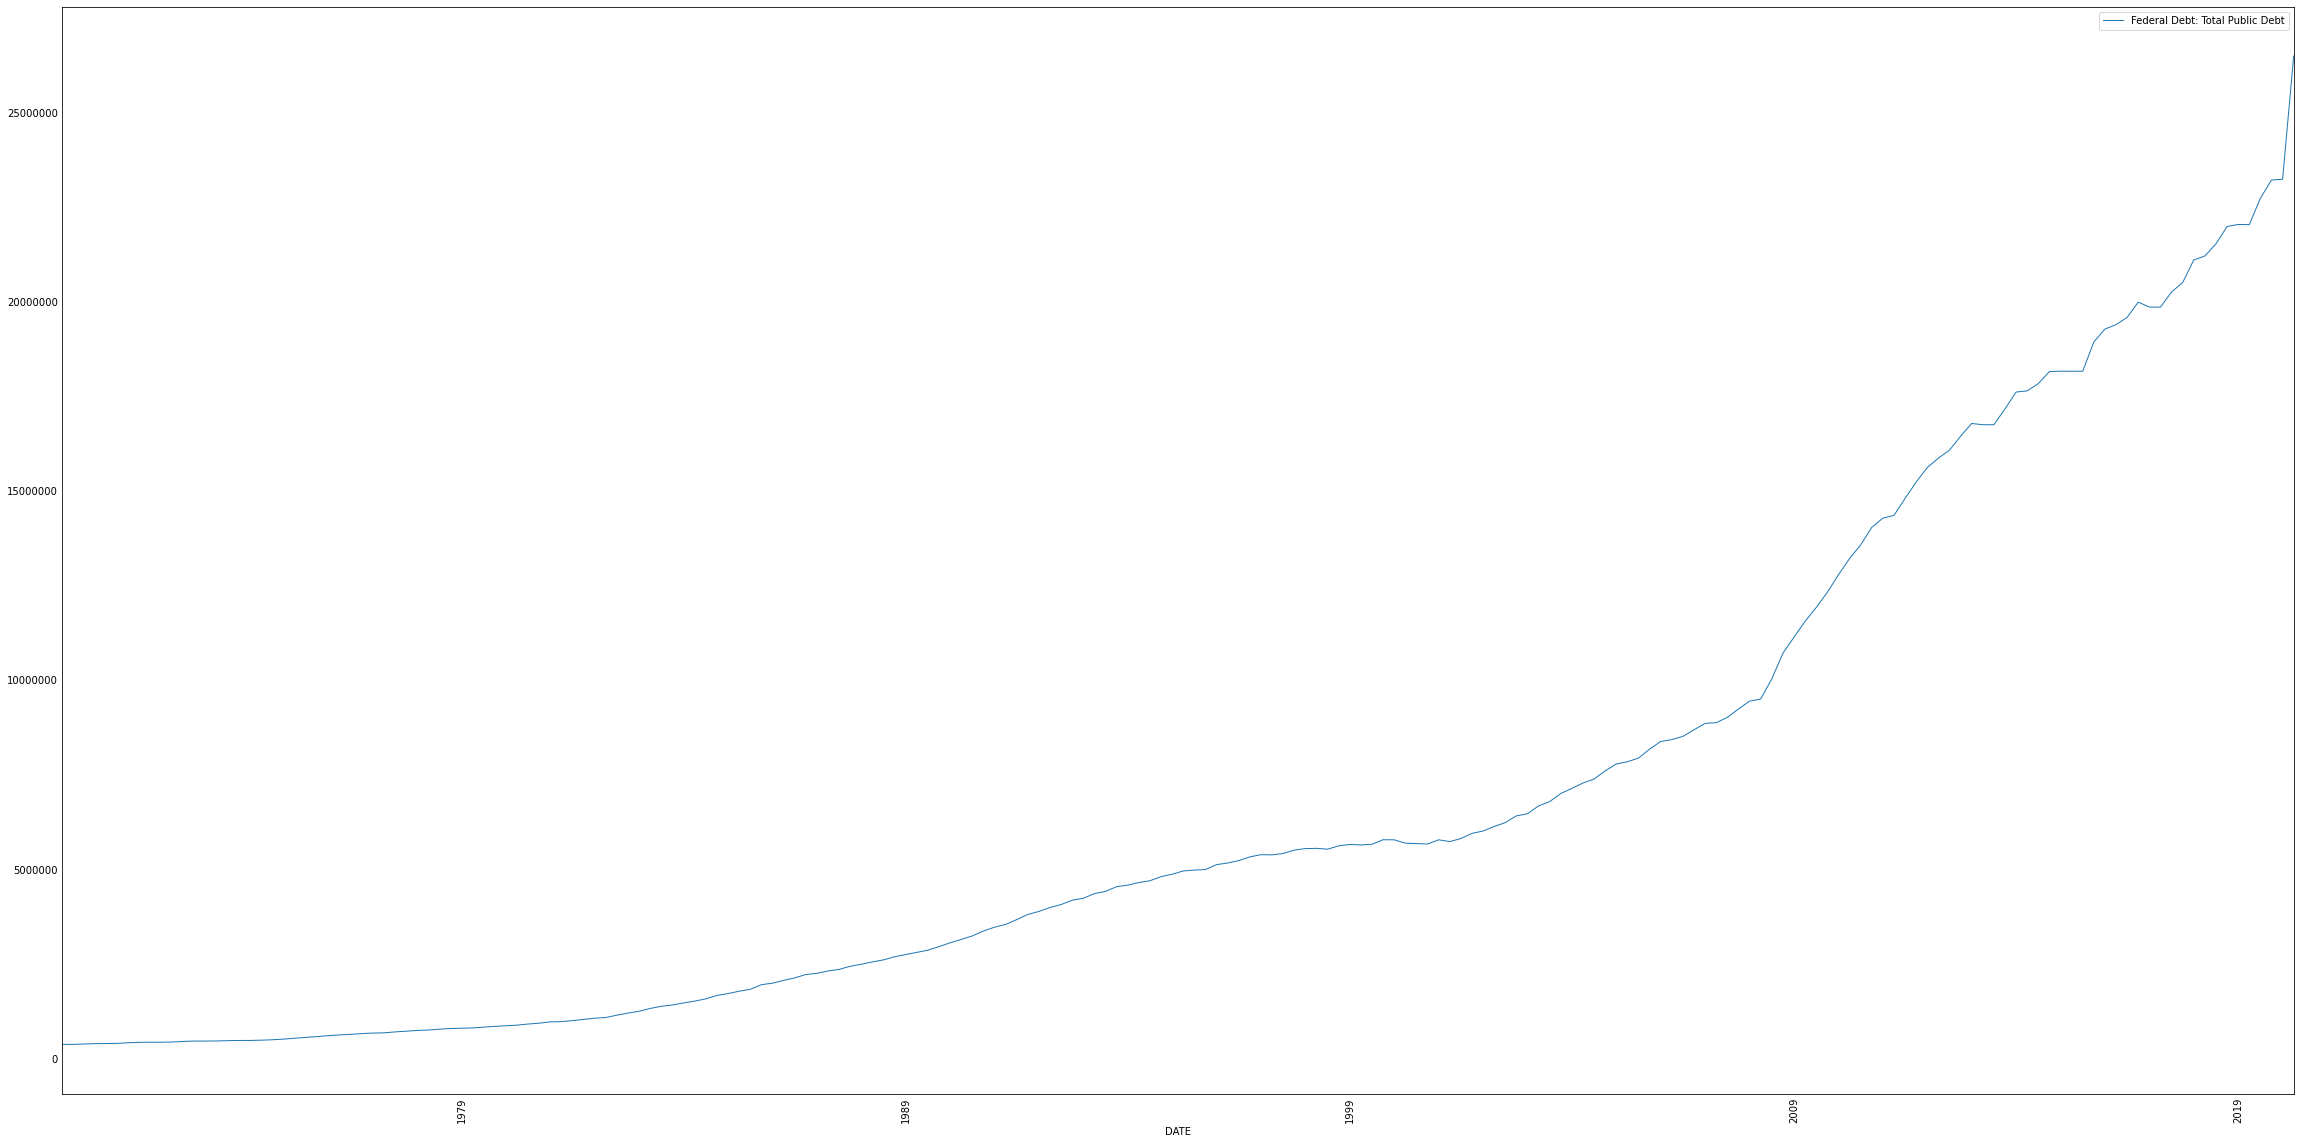

In [12]:
from datlib.plots import *

plot_lines(df = data, linewidth = 1, figsize = (40, 20), pp = None)